# HecoAnalytics (Mining Clinical Pathways)

### STEP-1. Installing and Importing the necessary libraries is the first and most important step before performing any operation with the code.

In [1]:
import numpy as np        #IMPORTING THE ESSENTIAL LIBRARIES
import matplotlib.pyplot as plt
import pandas as pd

%pip install mlxtend   # Installing mlextend library 
%pip install apriori
%pip install pandas
%pip install numpy
%pip install plotly
%pip install networkx
%pip install matplotlib
from mlxtend.frequent_patterns import apriori, association_rules
import seaborn as sns
import itertools

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


/Users/avisharma/opt/anaconda3/lib/python3.9/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Users/avisharma/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


### STEP-2. Importing the Orignal Data Set  (.CSV file) 

In [2]:
##Importing the data set

#Assign a variable in which the data will be stored for example here the data will be imported and will be stored in the variable "data" and it coould be changed.
data = pd.read_csv('MB.csv')
data.head() #this code will give you the snapshot of first five observations

/var/folders/rx/676xzzxd6sg6hdsntqqqh7780000gn/T/ipykernel_869/512716712.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('MB.csv')


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom


In [3]:
# data['CustomerID'] = data['CustomerID'].astype(str)

In [4]:
# data['Date']=data['Date'].astype(str)

Here output represents the snapshot of 5 instances/occurrences from the dataset.


# Let's get bit familiar with the Association rule mining

Association rule mining using machine learning models to analyze data for patterns or co-occurrence in a database.

It simply refers to the relationship between two items and how likely it is that one will be chosen if another item has already been chosen. We can predict how likely it is that I will purchase item B if I purchase item A.

The noticeable thing here are 2 words, if and then.

An association rule has 2 parts:
1.an antecedent (if) and
2.a consequent (then)

An item found in data is called an antecedent, and an item found in combination with an antecedent is called a consequent. Simply put, it is the association rule for retail stores to better target their customers.
If the above rule is a result of a thorough analysis of some data sets, it can be used to not only improve customer service but also improve the company’s revenue. Which is understood as if we have thorough data of how 2 products are bought or how a product is bought with another, we can increase customer reach by giving recommendations and offers.

It is obvious that we would need to use some mathematical instruments, called Performance measures, to conduct this analysis:
1.Lift
2.Support
3.Confidence







# Theoritical Overview of Apriori Algorithm

The Apriori algorithm is a machine learning algorithm that can be used to mine frequent itemsets and relevant association rules. It operates on the principle that "all non-empty subsets of a frequent itemset must be frequent." 

The above-mentioned performance measures, support, confidence, and lift, are used to define the association's rules. The algorithm reduces the number of candidates considered by only exploring the itemsets with more support than the minimum support count.

Now that we have a theoretical understanding of the Apriori algorithm, let us try to implement it on real-world datasets using Python. 
In the next section, we will use the apriori algorithm to mine a dataset of grocery store transactions for pairwise association rules. The confidence threshold is 0.5 (min confidence), and the min count (or the number of items that appear at least "min count" times) is 1.

### STEP-3. Final Implementation of Apriori Algorithm on the Data Set

Run the following code first, and when the output appears, enter the values for which you want to apply the algorithm.

In [5]:
print("Enter choice- Date or Country or CustomerID")   # Inputting user choice.Care should be taken to input words exactly as printed
y=input()                                            # Eg. Date or Country or CustomerID.This is the way the choice should be entered

Enter choice- Date or Country or CustomerID
Country


In [6]:
if y == 'Country':    # Grouping if choice is 'Country'
    country_input = input()  # Inputting specific country
    basket = data.groupby(["Country", "Itemname"])["Quantity"].sum().unstack().reset_index().fillna(0).set_index("Country")

     #One-hot Encoding 
    def one_hot_encoding(x):
        if x <= 0:
            return 0
        if x >= 1:
            return 1
    basket = basket.applymap(one_hot_encoding)
    print(basket.loc[country_input])
elif y == 'Date':    # Grouping if choice is 'Date'
    date_input=input()  # Inputting specific Date in format DD/MM/YYYY HH:MM WHERE HH:MM is the time
    basket = data.groupby(["Date", "Itemname"])["Quantity"].sum().unstack().reset_index().fillna(0).set_index("Date")
    print(basket.loc[date_input])
elif y == 'CustomerID':  # Grouping if choice is 'CustomerID'
    custid_input=input()   # Inputting specific CustomerID 
    basket = data.groupby(["CustomerID", "Itemname"])["Quantity"].sum().unstack().reset_index().fillna(0).set_index("CustomerID")
    print(basket.loc[custid_input])
else:
    print("Wrong Choice")    # Printing 'wrong choice' if user entered anything apart from the choices specified


United Kingdom
Itemname
*Boombox Ipod Classic           1
*USB Office Mirror Ball         1
10 COLOUR SPACEBOY PEN          1
12 COLOURED PARTY BALLOONS      1
12 DAISY PEGS IN WOOD BOX       1
                               ..
wrongly marked carton 22804     0
wrongly marked. 23343 in box    0
wrongly sold (22719) barcode    1
wrongly sold as sets            0
wrongly sold sets               0
Name: United Kingdom, Length: 4185, dtype: int64


In [10]:
#import apriori
# Selecting itemsets which have frequently been bought
frequent_itemsets = apriori(basket,use_colnames=True)
frequent_itemsets


/Users/avisharma/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.666667,(BAKING SET 9 PIECE RETROSPOT)
1,0.566667,(BAKING SET SPACEBOY DESIGN)
2,0.533333,(CHILDRENS CUTLERY CIRCUS PARADE)
3,0.600000,(CHILDRENS CUTLERY DOLLY GIRL)
4,0.500000,(CHILDRENS CUTLERY POLKADOT BLUE)
...,...,...
453,0.500000,"(CHILDRENS CUTLERY DOLLY GIRL, CHILDRENS CUTLE..."
454,0.500000,"(RED RETROSPOT MINI CASES, CHILDRENS CUTLERY P..."
455,0.500000,"(CHILDRENS CUTLERY DOLLY GIRL, CHILDRENS CUTLE..."
456,0.500000,"(CHILDRENS CUTLERY DOLLY GIRL, CHILDRENS CUTLE..."


In applying apriori algorithm, we are able to define the frequent data that we wanted by giving the support value. 
As you can see that there are 458 transaction that is consider as a frequently bought items. 
It is shown in the picture that "BAKING SET 9 PIECE RETROSPOT" is the most frequently bought items with the support value of 0.666667.

After applying the apriori algorithm and finding the frequently bought item, it is now the time for us to apply the association rules. 
From association rules, we could extract information and even discover knowledge about which items that is more effective to be sold together. That is the whole point of this project. Here’s how I did it.

In [34]:
# association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = rules.sort_values("lift", ascending = False).reset_index(drop=True)
#Collecting the inferred rules in a dataframe
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CHILDRENS CUTLERY POLKADOT BLUE),"(CHILDRENS CUTLERY DOLLY GIRL, PACK OF 72 RETR...",0.500000,0.500000,0.500000,1.000000,2.000000,0.250000,inf
1,"(PLASTERS IN TIN SPACEBOY, JUMBO BAG RED RETRO...","(CHILDRENS CUTLERY POLKADOT PINK, PACK OF 72 R...",0.500000,0.500000,0.500000,1.000000,2.000000,0.250000,inf
2,"(JAM MAKING SET PRINTED, CHILDRENS CUTLERY POL...","(JUMBO BAG RED RETROSPOT, PACK OF 72 RETROSPOT...",0.500000,0.500000,0.500000,1.000000,2.000000,0.250000,inf
3,"(CHILDRENS CUTLERY POLKADOT PINK, PLASTERS IN ...","(PLASTERS IN TIN CIRCUS PARADE, PACK OF 72 RET...",0.500000,0.500000,0.500000,1.000000,2.000000,0.250000,inf
4,"(JUMBO BAG RED RETROSPOT, PACK OF 72 RETROSPOT...","(JAM MAKING SET PRINTED, CHILDRENS CUTLERY POL...",0.500000,0.500000,0.500000,1.000000,2.000000,0.250000,inf
...,...,...,...,...,...,...,...,...,...
2161,(SET OF 3 CAKE TINS PANTRY DESIGN),(REGENCY CAKESTAND 3 TIER),0.566667,0.833333,0.500000,0.882353,1.058824,0.027778,1.416667
2162,(REGENCY CAKESTAND 3 TIER),(JAM MAKING SET PRINTED),0.833333,0.633333,0.533333,0.640000,1.010526,0.005556,1.018519
2163,(PLASTERS IN TIN WOODLAND ANIMALS),(REGENCY CAKESTAND 3 TIER),0.633333,0.833333,0.533333,0.842105,1.010526,0.005556,1.055556
2164,(JAM MAKING SET PRINTED),(REGENCY CAKESTAND 3 TIER),0.633333,0.833333,0.533333,0.842105,1.010526,0.005556,1.055556


From the association_rules results above, we could see that (CHILDRENS CUTLERY POLKADOT PINK, CHILDRENS CU...) AND (REGENCY CAKESTAND 3 TIER, CHILDRENS CUTLERY C...) are the items that has the highest association each other since these two items has the highest “lift” value. 

The higher the lift value, the higher the association between the items willl. If the lift value is more than 1, it is enough for us to say that those two items are associated each other. 

The lift of 2 means that the likelihood of buying (CHILDRENS CUTLERY POLKADOT PINK, CHILDRENS CU...) AND (REGENCY CAKESTAND 3 TIER, CHILDRENS CUTLERY C...) together is 2 times more than the likelihood of just buying (REGENCY CAKESTAND 3 TIER, CHILDRENS CUTLERY C...). The support of 0.5 means that they appear in transactions together in about 50% of all transactions.



In [35]:
# Final output including antecedents and consequents
rules_new = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules_new = rules.sort_values("lift", ascending = False)   # Sorting values according to the lift in descending order
rules_new = rules_new[['antecedents', 'consequents']]
rules_new

,antecedents,consequents
0,(CHILDRENS CUTLERY POLKADOT BLUE),"(CHILDRENS CUTLERY DOLLY GIRL, PACK OF 72 RETR..."
13,(CHILDRENS CUTLERY POLKADOT BLUE),"(CHILDRENS CUTLERY DOLLY GIRL, REGENCY CAKESTA..."
1,"(PLASTERS IN TIN SPACEBOY, JUMBO BAG RED RETRO...","(CHILDRENS CUTLERY POLKADOT PINK, PACK OF 72 R..."
23,"(CHILDRENS CUTLERY DOLLY GIRL, REGENCY CAKESTA...","(CHILDRENS CUTLERY POLKADOT BLUE, CHILDRENS CU..."
22,"(CHILDRENS CUTLERY DOLLY GIRL, PACK OF 72 RETR...",(CHILDRENS CUTLERY POLKADOT BLUE)
...,...,...
2157,(REGENCY CAKESTAND 3 TIER),(SET OF TEA COFFEE SUGAR TINS PANTRY)
2162,(REGENCY CAKESTAND 3 TIER),(JAM MAKING SET PRINTED)
2163,(PLASTERS IN TIN WOODLAND ANIMALS),(REGENCY CAKESTAND 3 TIER)
2164,(JAM MAKING SET PRINTED),(REGENCY CAKESTAND 3 TIER)


next is the CSV file containing all the sequences or association rules

In [36]:
#get all the sequences(pathways) in CSV file 

# importing the module
import pandas as pd
import numpy as np
  
#create a csv file
rules_new.to_csv("pathways.csv", index=True, header=True, index_label = "Location in Actual Dataset")
# The pathways csv file will get stored at th same location where the input csv file is stored

In [37]:
data1 = pd.read_csv('pathways.csv')   # Reading the data from the csv file just created

In [38]:
data1   # Printing the dataframe

,Location in Actual Dataset,antecedents,consequents
0,0,frozenset({'CHILDRENS CUTLERY POLKADOT BLUE'}),"frozenset({'CHILDRENS CUTLERY DOLLY GIRL', 'PA..."
1,13,frozenset({'CHILDRENS CUTLERY POLKADOT BLUE'}),"frozenset({'CHILDRENS CUTLERY DOLLY GIRL', 'RE..."
2,1,"frozenset({'PLASTERS IN TIN SPACEBOY', 'JUMBO ...","frozenset({'CHILDRENS CUTLERY POLKADOT PINK', ..."
3,23,"frozenset({'CHILDRENS CUTLERY DOLLY GIRL', 'RE...","frozenset({'CHILDRENS CUTLERY POLKADOT BLUE', ..."
4,22,"frozenset({'CHILDRENS CUTLERY DOLLY GIRL', 'PA...",frozenset({'CHILDRENS CUTLERY POLKADOT BLUE'})
...,...,...,...
2161,2157,frozenset({'REGENCY CAKESTAND 3 TIER'}),frozenset({'SET OF TEA COFFEE SUGAR TINS PANTR...
2162,2162,frozenset({'REGENCY CAKESTAND 3 TIER'}),frozenset({'JAM MAKING SET PRINTED'})
2163,2163,frozenset({'PLASTERS IN TIN WOODLAND ANIMALS'}),frozenset({'REGENCY CAKESTAND 3 TIER'})
2164,2164,frozenset({'JAM MAKING SET PRINTED'}),frozenset({'REGENCY CAKESTAND 3 TIER'})


 Although the sequence is generated but the appraoch is to create another column so as to depict,if a sequence shown under antecedent column is performed,the corresponding sequence under consequents column will be also performed.

In [39]:
df = pd.DataFrame(data=data1) # Creating a dataframe so as to perform concatenation

In [40]:
df["rep"]=df["antecedents"]+df["consequents"]  # Creating another column having both the antecedents as well as consequents for getting the whole sequence

In [41]:
df["rep"]  # Printing the column created

0       frozenset({'CHILDRENS CUTLERY POLKADOT BLUE'})...
1       frozenset({'CHILDRENS CUTLERY POLKADOT BLUE'})...
2       frozenset({'PLASTERS IN TIN SPACEBOY', 'JUMBO ...
3       frozenset({'CHILDRENS CUTLERY DOLLY GIRL', 'RE...
4       frozenset({'CHILDRENS CUTLERY DOLLY GIRL', 'PA...
                              ...                        
2161    frozenset({'REGENCY CAKESTAND 3 TIER'})frozens...
2162    frozenset({'REGENCY CAKESTAND 3 TIER'})frozens...
2163    frozenset({'PLASTERS IN TIN WOODLAND ANIMALS'}...
2164    frozenset({'JAM MAKING SET PRINTED'})frozenset...
2165    frozenset({'REGENCY CAKESTAND 3 TIER'})frozens...
Name: rep, Length: 2166, dtype: object

In [42]:
new_df = df["antecedents"]   # Storing the antecedents in new_df

In [43]:
new_df

0          frozenset({'CHILDRENS CUTLERY POLKADOT BLUE'})
1          frozenset({'CHILDRENS CUTLERY POLKADOT BLUE'})
2       frozenset({'PLASTERS IN TIN SPACEBOY', 'JUMBO ...
3       frozenset({'CHILDRENS CUTLERY DOLLY GIRL', 'RE...
4       frozenset({'CHILDRENS CUTLERY DOLLY GIRL', 'PA...
                              ...                        
2161              frozenset({'REGENCY CAKESTAND 3 TIER'})
2162              frozenset({'REGENCY CAKESTAND 3 TIER'})
2163      frozenset({'PLASTERS IN TIN WOODLAND ANIMALS'})
2164                frozenset({'JAM MAKING SET PRINTED'})
2165              frozenset({'REGENCY CAKESTAND 3 TIER'})
Name: antecedents, Length: 2166, dtype: object

In [44]:
new_df.duplicated()    # Seeing if there are some duplicates in the antecedents

0       False
1        True
2       False
3       False
4       False
        ...  
2161     True
2162     True
2163     True
2164     True
2165     True
Name: antecedents, Length: 2166, dtype: bool

In [45]:
# Sorting the antecedents based on highest number of duplicate values or items bought frequently
dups_color = df.pivot_table(columns=['antecedents'], aggfunc='size').sort_values(ascending=False)
print (dups_color)
max_items=dups_color.max()
print(max_items)


antecedents
frozenset({'REGENCY CAKESTAND 3 TIER'})                                                                             131
frozenset({'PACK OF 72 RETROSPOT CAKE CASES'})                                                                      115
frozenset({'BAKING SET 9 PIECE RETROSPOT'})                                                                          97
frozenset({'CHILDRENS CUTLERY POLKADOT PINK'})                                                                       94
frozenset({'CHILDRENS CUTLERY DOLLY GIRL'})                                                                          61
                                                                                                                   ... 
frozenset({'PLASTERS IN TIN SPACEBOY', 'SET OF 3 REGENCY CAKE TINS'})                                                 1
frozenset({'JAM MAKING SET PRINTED', 'PLASTERS IN TIN WOODLAND ANIMALS'})                                             1
frozenset({'PLASTERS IN TIN 

Here,the above output shows that 'REGENCY CAKESTAND 3 TIER' had the maximum repetition or it had been bought the maximum number of times followed by 'PACK OF 72 RETROSPOT CAKE CASES' and same in case of consequents as well.

In [46]:
new_df1 = df["consequents"]   # Storing consequents 

In [47]:
new_df1.duplicated()  # Checking which consequents are duplicate or repeating

0       False
1       False
2       False
3       False
4       False
        ...  
2161     True
2162     True
2163     True
2164     True
2165     True
Name: consequents, Length: 2166, dtype: bool

In [48]:
# Sorting based on consequents based on the highest number of items bought
dups_color1 = df.pivot_table(columns=['consequents'], aggfunc='size').sort_values(ascending=False)
print (dups_color1)
max_items1=dups_color1.max()
print(max_items1)

consequents
frozenset({'REGENCY CAKESTAND 3 TIER'})                                                                             131
frozenset({'PACK OF 72 RETROSPOT CAKE CASES'})                                                                      115
frozenset({'BAKING SET 9 PIECE RETROSPOT'})                                                                          97
frozenset({'CHILDRENS CUTLERY POLKADOT PINK'})                                                                       94
frozenset({'CHILDRENS CUTLERY DOLLY GIRL'})                                                                          61
                                                                                                                   ... 
frozenset({'PLASTERS IN TIN SPACEBOY', 'SET OF 3 REGENCY CAKE TINS'})                                                 1
frozenset({'JAM MAKING SET PRINTED', 'PLASTERS IN TIN WOODLAND ANIMALS'})                                             1
frozenset({'PLASTERS IN TIN 

In [50]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


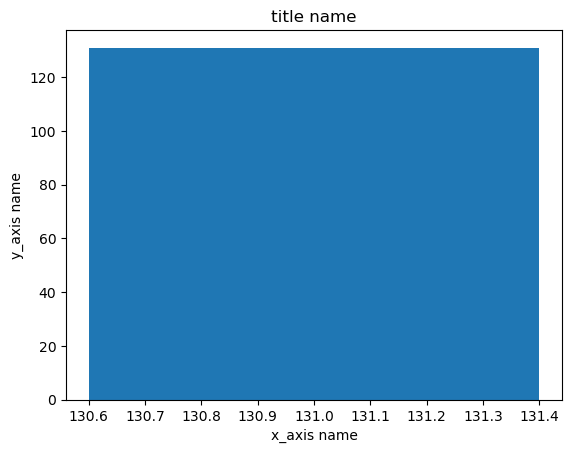

In [52]:
import matplotlib.pyplot as plt


plt.bar(max_items1,dups_color1)
plt.title('title name')
plt.xlabel('x_axis name')
plt.ylabel('y_axis name')
plt.show()